In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt


In [2]:
iris=load_iris()
X=iris.data
y=iris.target

In [3]:
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
import os

PROJECT_ROOT_DIR = "."

CHAPTER_ID = "decision_trees"
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,out_file=image_path("iris_tree_venkat.dot"),feature_names=iris.feature_names[:],
               class_names=iris.target_names,rounded=True,filled=True)

In [28]:
#a new tree has petal length as 5cm and petal width as 1.5 cm
print(tree_clf.predict_proba([[0,0,5,1.5]]))
print(tree_clf.predict([[0,0,5,1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


In [31]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

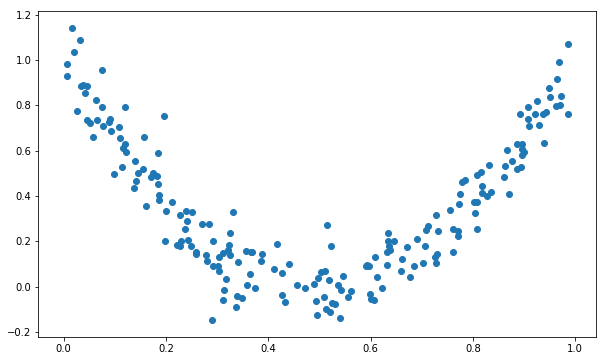

In [32]:

plt.figure(figsize=(10, 6))
plt.scatter(X,y)

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1=DecisionTreeRegressor(max_depth=2)
tree_reg2=DecisionTreeRegressor(max_depth=5)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
from sklearn.tree import export_graphviz
export_graphviz(tree_reg2,out_file=image_path("iris_tree_venkat2.dot"),feature_names=["X"],rounded=True,filled=True)

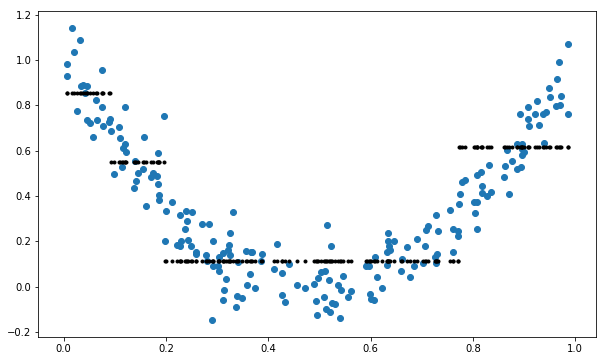

In [38]:

plt.figure(figsize=(10, 6))
plt.scatter(X,y)
predictions1=tree_reg1.predict(X)
predictions2=tree_reg2.predict(X)

#plt.plot(X,predictions2,'r.')
plt.plot(X,predictions1,'k.')

In [39]:
################ ensemble forest starts here#########


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=500, noise=0.30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

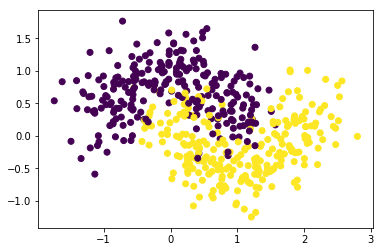

In [41]:
plt.scatter(X[:,0],X[:,1],c=y)

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,
                          oob_score=True)

In [45]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [47]:
bag_clf.oob_score_


0.928

In [49]:
bag_clf.score(X_test,y_test)

0.928

In [21]:
bag_clf.oob_decision_function_

array([[0.38020833, 0.61979167],
       [0.39313984, 0.60686016],
       [0.99744898, 0.00255102],
       [0.02216749, 0.97783251],
       [0.03157895, 0.96842105],
       [0.10498688, 0.89501312],
       [0.3974359 , 0.6025641 ],
       [0.0839895 , 0.9160105 ],
       [0.96143959, 0.03856041],
       [0.83507853, 0.16492147],
       [0.50877193, 0.49122807],
       [0.03846154, 0.96153846],
       [0.72431078, 0.27568922],
       [0.83636364, 0.16363636],
       [0.92447917, 0.07552083],
       [0.0961039 , 0.9038961 ],
       [0.03794038, 0.96205962],
       [0.90680101, 0.09319899],
       [0.69553806, 0.30446194],
       [0.96      , 0.04      ],
       [0.05013193, 0.94986807],
       [0.20954907, 0.79045093],
       [0.89378238, 0.10621762],
       [0.97877984, 0.02122016],
       [0.93766938, 0.06233062],
       [0.        , 1.        ],
       [0.97135417, 0.02864583],
       [1.        , 0.        ],
       [0.01617251, 0.98382749],
       [0.70967742, 0.29032258],
       [0.

In [ ]:
#random forest starts here

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
from sklearn.ensemble import RandomForestClassifier
rnd_forest_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_forest_clf.fit(X_train,y_train)
y_pred_clf=rnd_forest_clf.predict(X)

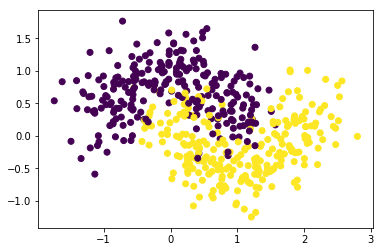

In [73]:
plt.scatter(X[:,0],X[:,1],c=y)

Text(0.5,1,'RF')

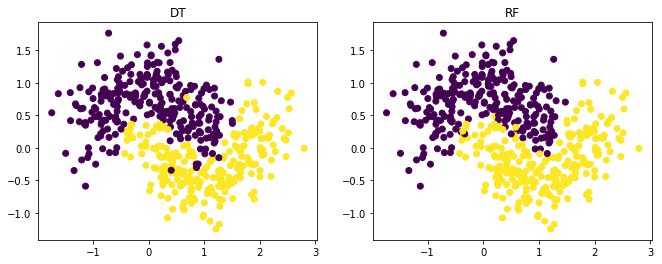

In [79]:
decision_tree_clf=DecisionTreeClassifier(max_leaf_nodes=16)
decision_tree_clf.fit(X_train,y_train)
y_pred_dt_clf=decision_tree_clf.predict(X)
plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c=y_pred_dt_clf)
plt.title("DT")
plt.subplot(122)
plt.scatter(X[:,0],X[:,1],c=y_pred_clf,label='RF')
plt.title("RF")

In [25]:
from sklearn.datasets import  load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1)
rnd_clf.fit(iris["data"],iris["target"])
for name,score in zip(iris.feature_names,rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.10342647039060193
sepal width (cm) 0.022155013672956785
petal length (cm) 0.46189201746181
petal width (cm) 0.4125264984746318


In [80]:
#dot -Tpng iris_tree_venkat2.dot -o iris_tree2.png


In [81]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/home/venkat/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


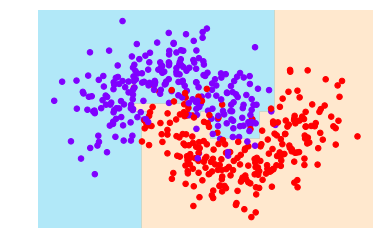

In [82]:
visualize_classifier(decision_tree_clf,X,y)

/home/venkat/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


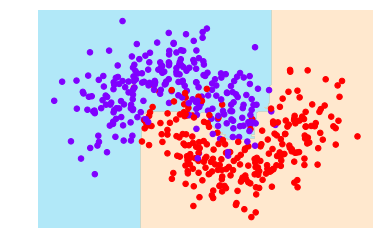

In [83]:
visualize_classifier(rnd_forest_clf,X,y)